In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [320]:
import pandas as pd
data=pd.read_excel("InterCalibrazione-2.xlsx", sheet_name='batch2' )
display(data)

channels = [0, 1,2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12,14, 15]
channel_idx = [0,  1, 2, 3, 4, 5, 6, 7,  8, 9,  10, 11, 12, -1, 13,14]

ch=np.zeros((12,5))
ch_err=np.zeros((12,5))



,ch,val_1,err_stat_1,val_2,err_stat_2,val_3,err_stat_3,val_4,err_stat_4,val_5,err_stat_5,media,std,drift relativo,Drift relativo [%],Range,val_6,err_stat_6
0,0.0,-630.4,1.3,-630.7,1.10,-629.0,1.30,-632.22,0.90,-632.50,1.10,-630.964,0.167332,0.000265,0.026520,L,-632.70,1.12
1,1.0,-590.4,1.1,-590.0,1.20,-586.0,1.30,-589.20,1.30,-589.10,1.00,-588.940,0.130384,0.000221,0.022139,NaN,-591.12,1.31
2,2.0,-2290.9,1.6,-2298.0,1.20,-2298.0,1.20,-2299.40,1.50,-2293.60,1.40,-2295.980,0.178885,0.000078,0.007791,L,-2295.01,1.47
3,3.0,-1413.0,2.0,-1409.1,1.50,-1405.0,1.80,-1414.00,1.70,-1413.80,1.50,-1410.980,0.212132,0.000150,0.015034,H,-1412.10,1.68
4,4.0,-950.5,1.1,-946.6,1.30,-947.0,1.10,-951.00,1.20,-949.60,1.00,-948.940,0.114018,0.000120,0.012015,H,-952.76,2.00
5,5.0,-1576.9,2.5,-1584.6,2.00,-1585.0,2.30,-1582.70,2.20,-1583.20,2.40,-1582.480,0.192354,0.000122,0.012155,H,-1582.80,2.90
6,6.0,-1064.1,1.5,-1063.7,1.40,-1062.7,1.60,-1068.10,1.60,-1058.10,1.50,-1063.340,0.083666,0.000079,0.007868,L,-1063.49,1.89
7,7.0,-1576.6,1.9,-1581.1,2.10,-1580.0,2.00,-1578.70,1.80,-1573.70,1.70,-1578.020,0.158114,0.000100,0.010020,H,-1582.58,1.60
8,8.0,-1226.7,2.9,-1229.0,3.00,-1239.3,3.00,-1234.50,3.50,-1235.50,2.30,-1233.000,0.427785,0.000347,0.034695,H,-1234.51,2.21
9,9.0,-671.3,1.0,-670.9,1.00,-672.1,1.10,-672.90,1.00,-668.02,0.84,-671.044,0.093381,0.000139,0.013916,NaN,-672.83,0.82


In [321]:
means=data["media"]   
print(data["media"][0])
print(channel_idx[1])

-630.9639999999999
1


In [322]:
means=data["media"]   
n_channels=15
peak_centers=np.zeros(n_channels)
peak_err_drift=np.zeros(n_channels)
for i in channels:
    peak_centers[channel_idx[i]]=data["media"][i]
    peak_err_drift[channel_idx[i]]=data["std"][i]
    

print(peak_centers)
print(peak_err_drift)

[ -630.964  -588.94  -2295.98  -1410.98   -948.94  -1582.48  -1063.34
 -1578.02  -1233.     -671.044  -550.6    -859.34   -828.92  -1436.06
 -2005.24 ]
[0.16733201 0.13038405 0.17888544 0.21213203 0.11401754 0.19235384
 0.083666   0.15811388 0.42778499 0.09338094 0.03507136 0.17888544
 0.10954451 0.19235384 0.48785244]


In [323]:
channel_ref=12
ref=peak_centers[channel_idx[channel_ref]]
print(ref)

-828.9199999999998


In [324]:
coeff_cal=peak_centers/peak_centers[channel_idx[channel_ref]]
print("coefficienti di intercalibrazione\n", coeff_cal)
list=[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15]

coefficienti di intercalibrazione
 [0.76118805 0.71049076 2.7698451  1.7021908  1.14479081 1.90908652
 1.28280172 1.90370603 1.48747768 0.80954012 0.6642378  1.03669835
 1.         1.73244704 2.41909955]


In [325]:
channels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]

##  Test

In [326]:
peak_centers=np.zeros(n_channels)
peak_err=np.zeros(n_channels)
for i in channels:
    peak_centers[channel_idx[i]]=data["val_6"][i]    #posizioni dei picchi dei dati di test
    peak_err[channel_idx[i]]=data["err_stat_6"][i]      #errori stocastici sulla posizione dei picchi

print(peak_centers)
print(peak_err)

[ -632.7   -591.12 -2295.01 -1412.1   -952.76 -1582.8  -1063.49 -1582.58
 -1234.51  -672.83  -551.96  -857.91  -824.32 -1435.02 -2004.21]
[1.12 1.31 1.47 1.68 2.   2.9  1.89 1.6  2.21 0.82 0.78 1.44 1.28 1.89
 2.45]


[ -632.7   -591.12 -2295.01 -1412.1   -952.76 -1582.8  -1063.49 -1582.58
 -1234.51  -672.83  -551.96  -857.91  -824.32 -1435.02 -2004.21]
[1.12 1.31 1.47 1.68 2.   2.9  1.89 1.6  2.21 0.82 0.78 1.44 1.28 1.89
 2.45]


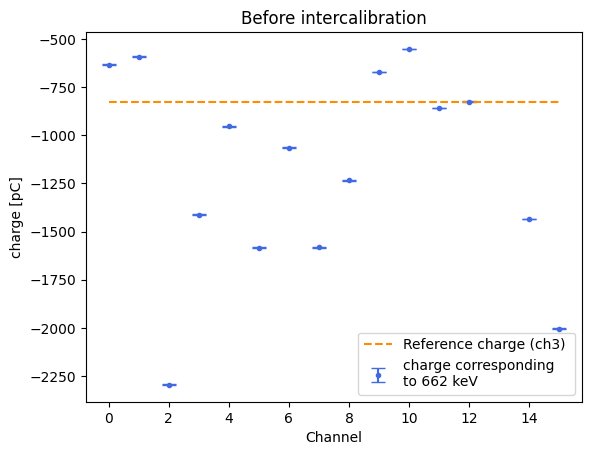

In [327]:
print( peak_centers)
print(peak_err )
plt.errorbar(list, peak_centers, yerr=peak_err, ls='', capsize=5, marker='.', color='royalblue', label='charge corresponding\nto 662 keV')
plt.title("Before intercalibration")
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference charge (ch3) '.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel("charge [pC]")
plt.legend(loc='lower right')

In [328]:
print(list)
print(channel_idx)
print(coeff_cal)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, -1, 13, 14]
[0.76118805 0.71049076 2.7698451  1.7021908  1.14479081 1.90908652
 1.28280172 1.90370603 1.48747768 0.80954012 0.6642378  1.03669835
 1.         1.73244704 2.41909955]


In [329]:
print(peak_centers)
print(coeff_cal)
print(peak_centers/coeff_cal)

[ -632.7   -591.12 -2295.01 -1412.1   -952.76 -1582.8  -1063.49 -1582.58
 -1234.51  -672.83  -551.96  -857.91  -824.32 -1435.02 -2004.21]
[0.76118805 0.71049076 2.7698451  1.7021908  1.14479081 1.90908652
 1.28280172 1.90370603 1.48747768 0.80954012 0.6642378  1.03669835
 1.         1.73244704 2.41909955]
[-831.20064536 -831.98830169 -828.56979991 -829.57797559 -832.25685417
 -829.08761943 -829.03693156 -831.31532782 -829.93514128 -831.12619083
 -830.9674595  -827.54062094 -824.32       -828.31969305 -828.49422174]


[-831.20064536 -831.98830169 -828.56979991 -829.57797559 -832.25685417
 -829.08761943 -829.03693156 -831.31532782 -829.93514128 -831.12619083
 -830.9674595  -827.54062094 -824.32       -828.31969305 -828.49422174]
[1.4713841  1.84379597 0.5307156  0.98696339 1.74704407 1.51905111
 1.4733376  0.8404659  1.48573658 1.01292076 1.17427824 1.38902507
 1.28       1.09094244 1.01277353]
[-1.55       -1.66412214  0.65986395 -0.66666667 -1.91       -0.11034483
 -0.07936508 -2.85       -0.68325792 -2.17804878 -1.74358974  0.99305556
  3.59375     0.55026455  0.42040816]
[-0.00177019 -0.00221613 -0.00064052 -0.00118972 -0.00209916 -0.0018322
 -0.00177717 -0.00101101 -0.00179018 -0.00121873 -0.00141315 -0.0016785
 -0.0015528  -0.00131705 -0.00122243]
[663.82139076 664.45043638 661.72031986 662.52547875 664.66491032
 662.13386583 662.09338499 663.91297956 662.81072182 663.76192917
 663.63516164 660.89838713 658.32630411 661.52057713 661.6599609 ]


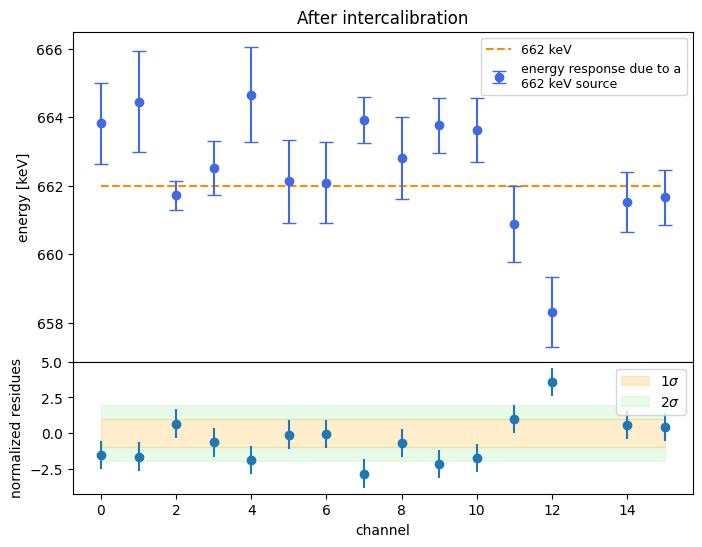

In [330]:


###########################################################################
test_peak_centers=np.array([peak_centers[channel_idx[i]]/coeff_cal[channel_idx[i]] for i in list])
print(test_peak_centers)
test_peak_errors=np.array([peak_err[channel_idx[i]]/coeff_cal[channel_idx[i]] for i in list])

print(test_peak_errors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [5, 2]})

print( (test_peak_centers-ref)/test_peak_errors  )
ax1.plot(list, 0*np.array(list) + 662, color='darkorange', ls='--', label='662 keV '.format(channel_ref))
ax1.errorbar(list, test_peak_centers*662/ref, yerr=test_peak_errors*662/np.abs(ref), ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
ax1.legend(fontsize=9)
ax1.set_title("After intercalibration")
ax1.set_ylabel("energy [keV]")

xlim = ax1.get_xlim()
ax2.errorbar(list,(np.array(test_peak_centers)-ref)/np.array(test_peak_errors), yerr=1, ls=' ', marker='o')
ax2.fill_between([0,15], [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between([0,15], [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between([0,15], [2, 2], [1, 1], color = "lightgreen", alpha = 0.2)
ax2.set_xlabel("channel")
ax2.set_ylabel("normalized residues")
ax2.legend()
plt.subplots_adjust(hspace=0)

print(test_peak_errors/test_peak_centers)
print(test_peak_centers*662/ref)

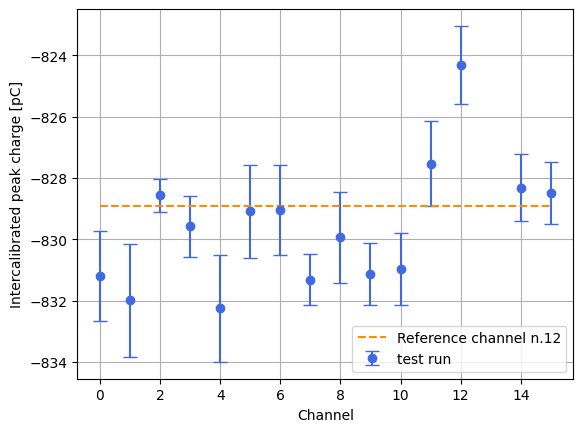

In [331]:
#plot
#plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', capsize=5,  marker='o', color='darkorange', label= 'calibration run')
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', capsize=5, marker='o', color='royalblue', label='test run')
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference channel n.{}'.format(channel_ref))
#plt.plot(list, (test_peak_centers-ref)/test_peak_errors, ls='', marker='o', color='red')
#plt.ylim(peak_centers[channel_ref]-50, peak_centers[channel_ref]+50)
#plt.ylim(-990, -930)
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge [pC]')
plt.legend(loc= 'lower right')


#plot in kev
    

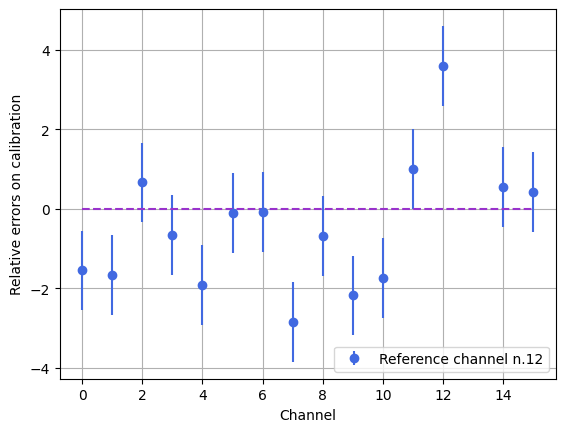

In [332]:
plt.errorbar(list, (test_peak_centers-ref)/test_peak_errors, yerr=1, ls='', marker='o', color='royalblue', label='Reference channel n.{}'.format(channel_ref))
plt.plot(list, 0*np.array(list), color='darkorchid', ls='--')
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Relative errors on calibration')
plt.legend(loc= 'lower right')



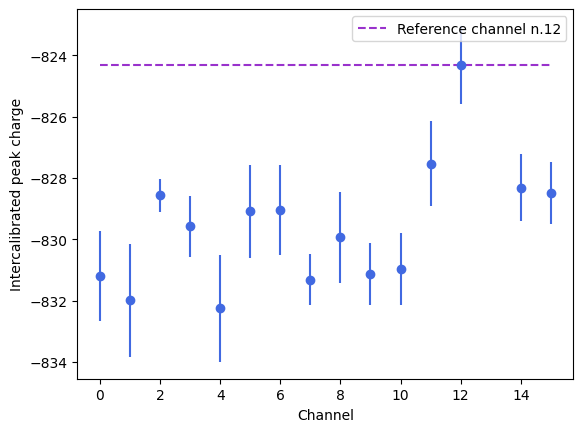

In [333]:
#plot con train e test insieme
#plot
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='royalblue')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='darkorchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    

In [334]:
#0, 3, 5, 7, 10, 15
nice_channels=[0, 2,3,4, 5,6, 7, 8,10, 11,14,15]

# Picchi all together train

In [335]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data

In [336]:
PATH_MARTI="../Dati/Run_chall_ChargeHistos_4_12_2024_10M.dat"
#PATH_SAM="../Dati/12_APR/Run_chall_ChargeHistos_4_12_2024_10M.dat"
edge_N_all, bin_N_all = load_histo(PATH_MARTI)

channel = 0

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, -1, -1, 11, 12]

    
edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


FileNotFoundError: ../Dati/Run_chall_ChargeHistos_4_12_2024_10M.dat not found.

Text(0, 0.5, 'counts')

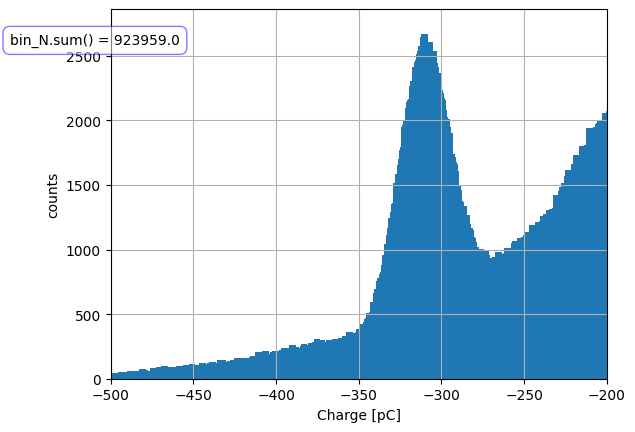

In [ ]:
lim_list = [[-500, -200],  #ch0
                [-1, -1],  #ch1
                [-360, -300],  #ch2
                [-350, -280],  #ch3
                [-320, -263],  #ch4
                [-320, -270],  #ch5
                [-310, -250],  #ch6
                [-365, -310],  #ch7
                [-335, -280],  #ch8
                [340, 470],  #ch9
                [-409, -340],  #ch10
                [-318, -255],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-350, -280],  #ch14
                [-340, -290]   #ch15
                ]

lim_N = lim_list[channel]
plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

2289.0


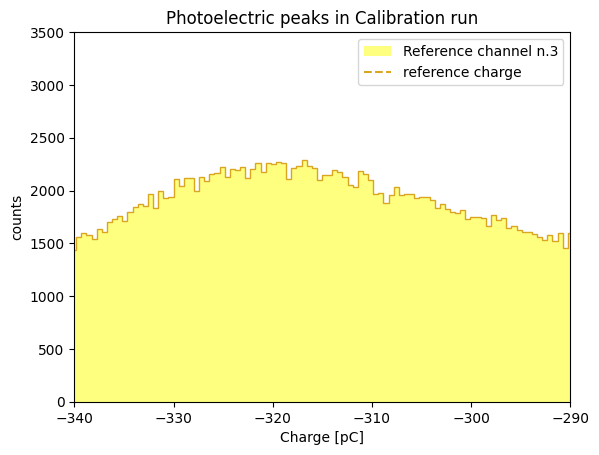

In [ ]:
for ch in nice_channels:

    lim_N=lim_list[ch]
    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]
    centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
    edge_N=edge_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
    centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

    #sfrutto la ricalibrazione per spostare i picchi

    if(ch!=channel_ref):
        #plt.bar(centers_N/coeff_c
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False)
    else:
        plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, color='yellow', alpha=0.5, label ='Reference channel n.{}'.format(channel_ref))
        counts,b,p=plt.hist(edge_N/coeff_cal[ch], bins=len(bin_N), weights=bin_N, linewidth=1, histtype='step',fill=False, edgecolor='goldenrod')
        plt.vlines(x=peak_centers[channel_ref], ymin=0, ymax=np.max(counts), linestyle='--', linewidth=1.5, color='goldenrod', label='reference charge')
        print(np.max(counts))

plt.xlim(-340, -290)
plt.ylim(0, 3500)
plt.xlabel("Charge [pC]")
plt.ylabel("counts")
plt.title('Photoelectric peaks in Calibration run')
plt.legend()





   

# Picchi all together test

In [ ]:
PATH_HR = "../Dati/5_batch/Run_chall_2000_ChargeHistos_4_19_2024.dat"
#PATH_LR = "../Dati/5_batch/Run_chall_1000pc_ChargeHistos_4_19_2024.dat"
channel = 15

if(channel == 12 or channel == 13 or channel == 1 or channel == 9):
    raise Exception("Cambia canale")

channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]


edge_N_all, bin_N_all = load_histo(PATH_HR)



edge_N = edge_N_all[channel_idx[channel]]
bin_N = bin_N_all[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")

Text(0, 0.5, 'counts')

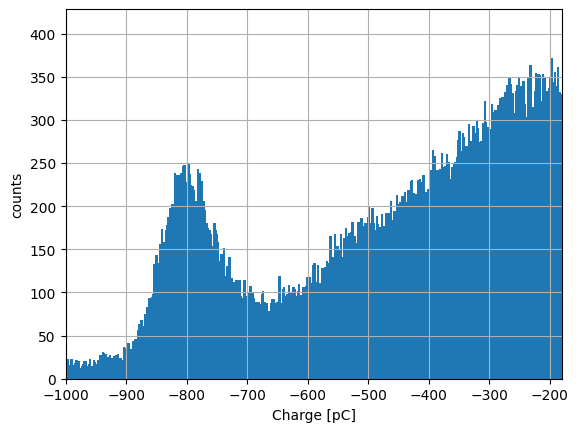

In [ ]:
lim_list = [[-1000, -180],  #ch0
                [-1, -1],  #ch1
                [-1000, -180],  #ch2
                [-2000, -180],  #ch3
                [-2000, -180],  #ch4
                [-2000, -180],  #ch5
                [-1000, -180],  #ch6
                [-2000, -180],  #ch7
                [-2000, -180],  #ch8
                [-2000, -180],  #ch9
                [-1000, -180],  #ch10
                [-1000, -180],  #ch11
                [-1, -1],  #ch12
                [-1, -1],  #ch13
                [-1000, -180],  #ch14
                [-1000, -180]   #ch15
                ]

lim_N = lim_list[channel]
#plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
    #     bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

In [ ]:
def rebin_(edge_N,bin_N,rebin_fact):
    bin_N = rebin(bin_N, rebin_fact)
    tmp = []
    for i in range(len(edge_N)):
        if(i % rebin_fact == 0):
            tmp.append(edge_N[i])

    edge_N = np.array(tmp)
    return edge_N,bin_N

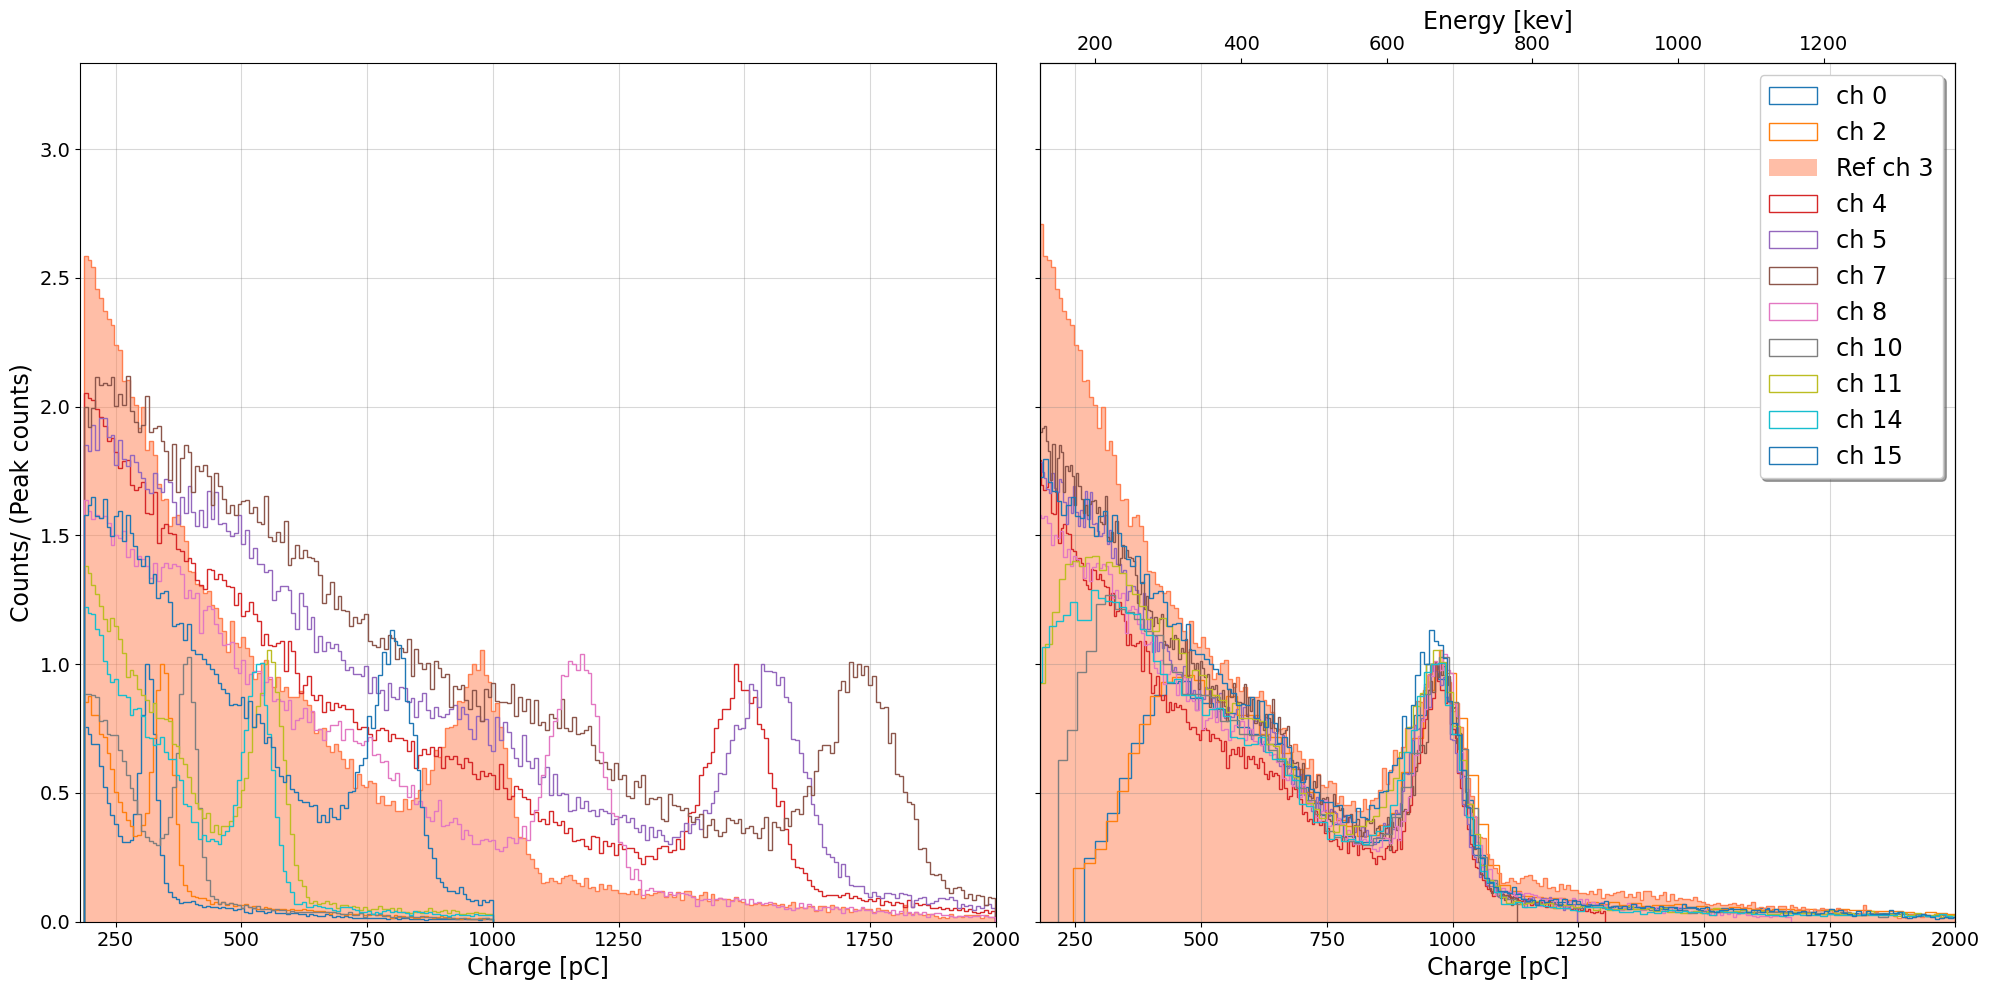

In [ ]:

# Creazione del subplot con due grafici con asse y condiviso
fig, (ax3, ax1) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

# Posizioni dei picchi
peakpos = np.array(data["val_5"])

# Spessore delle linee dei grafici
lw = 1

# Canali interessanti
nice_channels = [0, 2, 3, 4, 5, 7, 8, 10, 11, 14, 15]

# Fattore di rebinning
rebinning = 4

# Funzione per processare il canale
def process_channel(ax, ch):

    lim_N = lim_list[ch]

    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]

    # Rebinning
    edge_N, bin_N = rebin_(edge_N, bin_N, rebinning)

    # Convolution
    centers_N = np.convolve(edge_N, [0.5,0.5], mode='valid')

    # Filtraggio basato sui limiti solo per ax3
    if ax == ax3:
        indices = (centers_N > lim_N[0]) & (centers_N < lim_N[1])
        edge_N = edge_N[:len(centers_N)][indices]
        bin_N = bin_N[:len(centers_N)][indices]

    # Indice del picco più vicino
    peak_index = np.argmin(np.abs(peakpos[ch] - edge_N))

    # Normalizzazione
    if ax == ax1:
        edge_N /= coeff_cal[ch]
    bin_N /= bin_N[peak_index]

    label = 'ch {}'.format(ch)
    if ch == channel_ref:
        label = 'Ref ch {}'.format(channel_ref)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, color='coral', alpha=0.5, label=label)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, edgecolor='coral')
    else:
        # Plot per gli altri assi
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, label=label)

# Processa i canali interessanti per il grafico 1
for ch in nice_channels:
    process_channel(ax1, ch)

# Aggiunge la legenda per ax1
ax1.legend(ncol=1, fancybox=True, shadow=True, fontsize="xx-large")

# Limiti sull'asse x per ax1
low, high = 180, 2000
ax1.set_xlim(low, high)

# Etichetta sull'asse x per ax1
ax1.set_xlabel("Charge [pC]", fontsize=17)

# Aggiunge l'asse x gemello
ax2 = ax1.twiny()
ax2.set_xlabel('Energy [kev]', fontsize=17)

#Proporzione secondo asse
ax2.set_xlim(low * 662. / 959, high * 662. / 959)

# Processa i canali interessanti per il grafico 2
for ch in nice_channels:
    process_channel(ax3, ch)

# Limiti dell'asse x, le label e le dimensioni dei caratteri per ax3
ax3.set_xlim(low, high)
ax3.set_xlabel("Charge [pC]", fontsize=17)
ax3.set_ylabel("Counts/ (Peak counts)", fontsize=17)
ax3.set_axisbelow(True)

# Griglia per entrambi gli assi
ax1.grid(color='gray', alpha=0.3)
ax3.grid(color='gray', alpha=0.3)

# Dimensioni dei caratteri per gli assi
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Layout stretto
plt.tight_layout()

# Salva il grafico
plt.savefig("intercalibrazione.png")

